# Blatt 5

## Aufgabe 2

Wir wollen die Wirkung eines Fourier-Filter anhand einer Bildaufbereitung ausprobieren.
Folgendes Bild enth ̈alt ein unsch ̈ones Streifenmuster
![lincoln](lincoln.jpg)
Schreibe ein Python-Programm analog zu Aufgabe 1, um das Bild durch eine 2-dimensionale
DFT in den Fourierraum zu transformiern und mit Hilfe eines geeigneten Filters und
R ̈ucktransformation die Bildqualit ̈at zu verbesser

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Original')

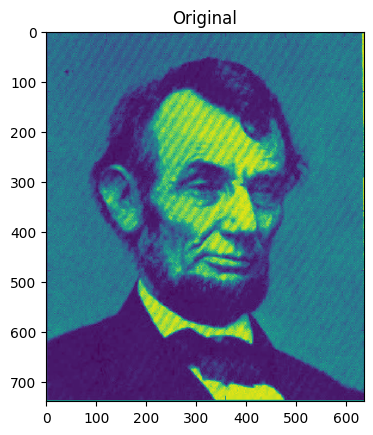

In [2]:
img = plt.imread('lincoln.jpg')
#convert to greyscale
img = np.dot(img[...,:3], [0.299, 0.587, 0.114])
plt.imshow(img)
plt.title('Original')

Text(0.5, 1.0, 'Fourier Transform')

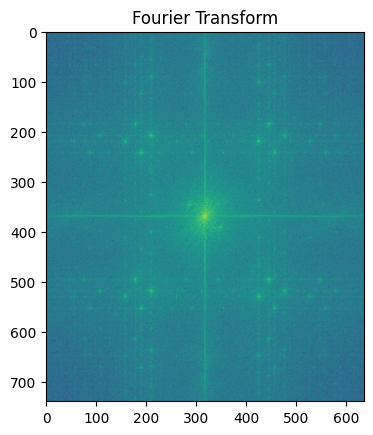

In [3]:
#fourier transform
img_fft = np.fft.fft2(img)
#shift the fourier transform
img_fft = np.fft.fftshift(img_fft)
plt.imshow(np.log(np.abs(img_fft)))
plt.title('Fourier Transform')

/tmp/ipykernel_4115240/1946782526.py:15: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(img_fft_masked)))


Text(0.5, 1.0, 'Fourier Transform with Mask')

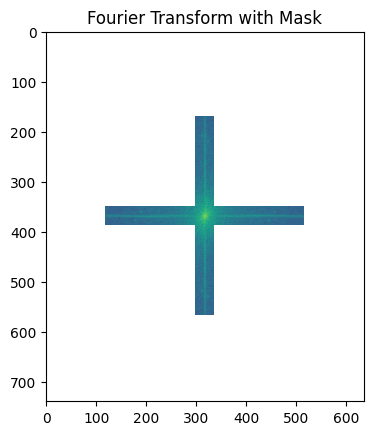

In [4]:
# create a mask
w = 20
l = 200

mask = np.zeros(img.shape)
mask[img.shape[0]//2-w:img.shape[0]//2+w,
    img.shape[1]//2-l:img.shape[1]//2+l] = 1

mask[img.shape[0]//2-l:img.shape[0]//2+l,
    img.shape[1]//2-w:img.shape[1]//2+w] = 1

# apply mask
img_fft_masked = img_fft * mask

plt.imshow(np.log(np.abs(img_fft_masked)))
plt.title('Fourier Transform with Mask')

# plt.xlim(250,400)
# plt.ylim(300,450)

Text(0.5, 1.0, 'Inverse Fourier Transform')

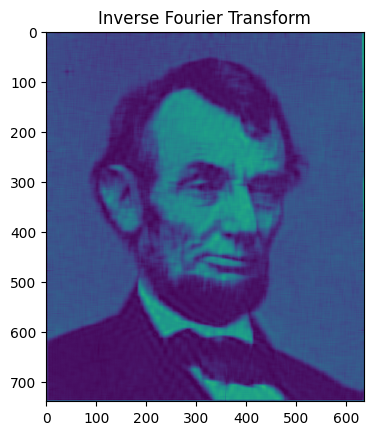

In [5]:
# inverse fourier transform
img_ifft = np.fft.ifft2(img_fft_masked)

plt.imshow(np.abs(img_ifft))
plt.title('Inverse Fourier Transform')

In [6]:
def mapcolors(n):
    """Return a list of n colors from the default colormap"""
    return [plt.cm.jet(int(x*plt.cm.jet.N/n)) for x in range(n)]
colors = mapcolors(len(img_ifft))

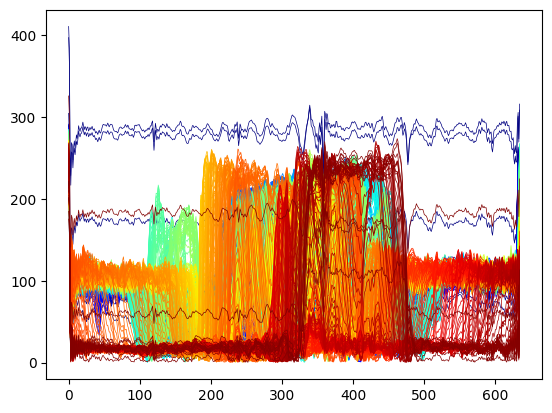

In [7]:
for i , x in enumerate(np.abs(img_ifft)):
    plt.plot(x, color=colors[i],lw=0.5)

# the edges of the image (dark blue and dark red) are an artifact of the fourier transform

Text(0.5, 1.0, 'Inverse Fourier Transform with 2 pixel border cut off')

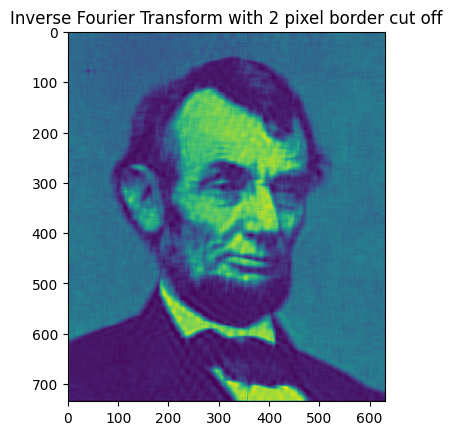

In [8]:
# cut off 2 pixel borders
plt.imshow(np.abs(img_ifft[2:-2,2:-2]))
plt.title('Inverse Fourier Transform with 2 pixel border cut off')

Text(0.5, 1.0, 'Edited')

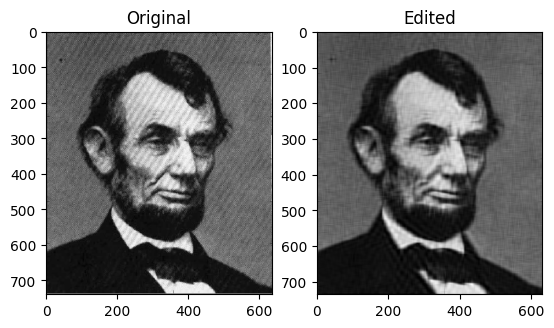

In [9]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original')

ax[1].imshow(np.abs(img_ifft[2:-2,2:-2]), cmap='gray')
ax[1].set_title('Edited')